In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
import folium
import requests as req
import json
import time

In [ ]:
url = "https://api.nytimes.com/svc/books/v3/lists/best-sellers/history.json?&api-key="
api_key = "HkAJX93noRBfDJvXiaCYBSBWEMIb2all"

articles = []
for i in range(0,3000,20):
    url = f'https://api.nytimes.com/svc/books/v3/lists/best-sellers/history.json?&api-key=HkAJX93noRBfDJvXiaCYBSBWEMIb2all&offset={i}'
    res = req.get(url).json()
    docs = res['results']
    for doc in docs:
        dic = {}
        dic['Title'] = doc['title']
        dic['Publisher'] = doc['publisher']
        dic['Author'] = doc['author']
        dic['Description'] = doc['description']
        dic['Contributor'] = doc['contributor']
        dic['Price'] = doc['price']
        dic['Ranks_history'] = doc['ranks_history']
        
        articles.append(dic)
        
    time.sleep(6)
    
data = pd.DataFrame(articles)
data

In [1]:
data.to_excel('Best_Seller1.xlsx')

NameError: name 'data' is not defined

In [2]:
def ptr(val):
    val = str(val)
    val = re.findall("('rank': \d+)",val)
    return val

def publishdate(val):
    val = str(val)
    val = re.findall("(\d{4}-\d{2}-\d{2})",val)[0:1]
    return val

def best_seller_(val):
    val = str(val)
    val = re.findall("(\d{4}-\d{2}-\d{2})",val)[1:2]
    return val

def weeks_on_list(val):
    val = str(val)
    val = re.findall("('weeks_on_list': \d+)",val)[0:1]
    return val

def rank_last_week(val):
    v = str(val)
    val = re.findall("('rank_last_week': \d+)",val)[0:1]
    return val

def WOLandRLW(val):
    val = str(val)
    val = re.findall("\d+",val)
    return val

def PUBandBS_y(val):
    ptr = r"published_date': '(\d{4})"
    match = re.search(ptr,val)
    if match:
        return match[1]
    else:
        return None

def PUBandBS_m(val):
    ptr = r"published_date': '(\d{2})"
    match = re.search(ptr,val)
    if match:
        return match[-1]
    else:
        return None
    
def rank_clean(val):
    val = str(val)
    val = re.findall("(['rank': ]+\d+,)",val)
    return val

def yr(val):
    return re.findall(r"(\d{4})",val)

In [3]:
best_seller = pd.read_excel(r'E:\Python Program\Jupyter Notebook\Assignment\API\Best_Seller.xlsx')

In [4]:
best_seller

,Unnamed: 0,Title,Publisher,Author,Description,Contributor,Price,Ranks_history
0,0,"""I GIVE YOU MY BODY ...""",Dell,Diana Gabaldon,The author of the Outlander novels gives tips ...,by Diana Gabaldon,0.0,"[{'primary_isbn10': '0399178570', 'primary_isb..."
1,1,"""MOST BLESSED OF THE PATRIARCHS""",Liveright,Annette Gordon-Reed and Peter S Onuf,A character study that attempts to make sense ...,by Annette Gordon-Reed and Peter S. Onuf,0.0,"[{'primary_isbn10': '0871404427', 'primary_isb..."
2,2,"""YOU JUST NEED TO LOSE WEIGHT""",Beacon,Aubrey Gordon,The co-host of the podcast “Maintenance Phase”...,by Aubrey Gordon,0.0,"[{'primary_isbn10': '0807006475', 'primary_isb..."
3,3,#ASKGARYVEE,HarperCollins,Gary Vaynerchuk,The entrepreneur expands on subjects addressed...,by Gary Vaynerchuk,0.0,"[{'primary_isbn10': '0062273124', 'primary_isb..."
4,4,#GIRLBOSS,Portfolio/Penguin/Putnam,Sophia Amoruso,An online fashion retailer traces her path to ...,by Sophia Amoruso,0.0,"[{'primary_isbn10': '1591847931', 'primary_isb..."
...,...,...,...,...,...,...,...,...
1995,1995,"American Bloomsbury: Louisa May Alcott, Ralph ...",NaN,Susan Cheever,NaN,NaN,0.0,[]
1996,1996,AMERICAN BORN CHINESE,Square Fish,Gene Luen Yang,"When his family moves to the suburbs, Jin Wang...",by Gene Luen Yang,0.0,"[{'primary_isbn10': '0312384483', 'primary_isb..."
1997,1997,AMERICAN CARNAGE,Harper,Tim Alberta,Politico Magazine’s chief political correspond...,by Tim Alberta,0.0,"[{'primary_isbn10': '006289644X', 'primary_isb..."
1998,1998,American Cassandra: The Life of Dorothy Thompson,NaN,Peter Kurth,NaN,NaN,0.0,[]


In [5]:
best_seller = best_seller.drop(['Unnamed: 0'],axis=1)

In [6]:
clean_data = best_seller

In [7]:
clean_data['Publish_Year'] = clean_data['Ranks_history'].apply(PUBandBS_y)
clean_data['Best_Seller_Year'] = clean_data['Ranks_history'].apply(PUBandBS_y)

In [157]:
a =clean_data['Ranks_history'].apply(PUBandBS_m)

IndexError: no such group

In [126]:
clean_data

,Title,Publisher,Author,Description,Contributor,Price,Ranks_history,Publish_Year,Best_Seller_Year
0,"""I GIVE YOU MY BODY ...""",Dell,Diana Gabaldon,The author of the Outlander novels gives tips ...,by Diana Gabaldon,0.0,"[{'primary_isbn10': '0399178570', 'primary_isb...",2016,2016
1,"""MOST BLESSED OF THE PATRIARCHS""",Liveright,Annette Gordon-Reed and Peter S Onuf,A character study that attempts to make sense ...,by Annette Gordon-Reed and Peter S. Onuf,0.0,"[{'primary_isbn10': '0871404427', 'primary_isb...",2016,2016
2,"""YOU JUST NEED TO LOSE WEIGHT""",Beacon,Aubrey Gordon,The co-host of the podcast “Maintenance Phase”...,by Aubrey Gordon,0.0,"[{'primary_isbn10': '0807006475', 'primary_isb...",2023,2023
3,#ASKGARYVEE,HarperCollins,Gary Vaynerchuk,The entrepreneur expands on subjects addressed...,by Gary Vaynerchuk,0.0,"[{'primary_isbn10': '0062273124', 'primary_isb...",2016,2016
4,#GIRLBOSS,Portfolio/Penguin/Putnam,Sophia Amoruso,An online fashion retailer traces her path to ...,by Sophia Amoruso,0.0,"[{'primary_isbn10': '1591847931', 'primary_isb...",2016,2016
...,...,...,...,...,...,...,...,...,...
1995,"American Bloomsbury: Louisa May Alcott, Ralph ...",NaN,Susan Cheever,NaN,NaN,0.0,[],None,None
1996,AMERICAN BORN CHINESE,Square Fish,Gene Luen Yang,"When his family moves to the suburbs, Jin Wang...",by Gene Luen Yang,0.0,"[{'primary_isbn10': '0312384483', 'primary_isb...",2020,2020
1997,AMERICAN CARNAGE,Harper,Tim Alberta,Politico Magazine’s chief political correspond...,by Tim Alberta,0.0,"[{'primary_isbn10': '006289644X', 'primary_isb...",2019,2019
1998,American Cassandra: The Life of Dorothy Thompson,NaN,Peter Kurth,NaN,NaN,0.0,[],None,None


In [105]:
clean_data['Publishing_Date'] = clean_data['Ranks_history'].apply(publishdate)
clean_data['Best_Seller'] = clean_data['Ranks_history'].apply(best_seller_)
clean_data['Week_On_List'] = clean_data['Ranks_history'].apply(weeks_on_list)
clean_data['Rank_Last_Week'] = clean_data['Ranks_history'].apply(rank_last_week)
clean_data.fillna({'Publishing_Date':'NaN'},inplace=True)
clean_data['Publishing_Date'] = clean_data['Publishing_Date'].apply(PUBandBS)
clean_data['Publishing_Month'] = clean_data['Publishing_Date'].apply(WOLandRLW)
clean_data['Publishing_Year'] = clean_data['Publishing_Month']
clean_data['Publishing_Month'] = clean_data['Publishing_Month']
clean_data['Best_Seller'] = clean_data['Best_Seller'].apply(PUBandBS)
clean_data['Best_Seller_Month'] = clean_data['Best_Seller'].apply(WOLandRLW)
clean_data['Best_Seller_Year'] = clean_data['Best_Seller_Month'][0][0]
clean_data['Best_Seller_Month'] = clean_data['Best_Seller_Month'][0][1]
clean_data['Week_On_List'] = clean_data['Week_On_List'].apply(WOLandRLW)
clean_data['Rank_Last_Week'] = clean_data['Rank_Last_Week'].apply(WOLandRLW)
clean_data['Rank'] = clean_data['Ranks_history'].apply(rank_clean)
clean_data['Rank'] = clean_data['Rank'].apply(WOLandRLW)

TypeError: expected string or bytes-like object

clean_data['Best_Seller_Year'] = clean_data['Best_Seller'][0][0]
clean_data['Best_Seller_Month'] = clean_data['Best_Seller'][0][1]

In [106]:
df = clean_data

In [107]:
df

,Title,Publisher,Author,Description,Contributor,Price,Ranks_history,date,Publishing_Date,Best_Seller,Week_On_List,Rank_Last_Week
0,"""I GIVE YOU MY BODY ...""",Dell,Diana Gabaldon,The author of the Outlander novels gives tips ...,by Diana Gabaldon,0.0,"[{'primary_isbn10': '0399178570', 'primary_isb...",None,[2016-09-04],[2016-08-20],['weeks_on_list': 1],['rank_last_week': 0]
1,"""MOST BLESSED OF THE PATRIARCHS""",Liveright,Annette Gordon-Reed and Peter S Onuf,A character study that attempts to make sense ...,by Annette Gordon-Reed and Peter S. Onuf,0.0,"[{'primary_isbn10': '0871404427', 'primary_isb...",None,[2016-05-01],[2016-04-16],['weeks_on_list': 1],['rank_last_week': 0]
2,"""YOU JUST NEED TO LOSE WEIGHT""",Beacon,Aubrey Gordon,The co-host of the podcast “Maintenance Phase”...,by Aubrey Gordon,0.0,"[{'primary_isbn10': '0807006475', 'primary_isb...",None,[2023-01-29],[2023-01-14],['weeks_on_list': 1],['rank_last_week': 0]
3,#ASKGARYVEE,HarperCollins,Gary Vaynerchuk,The entrepreneur expands on subjects addressed...,by Gary Vaynerchuk,0.0,"[{'primary_isbn10': '0062273124', 'primary_isb...",None,[2016-04-10],[2016-03-26],['weeks_on_list': 0],['rank_last_week': 0]
4,#GIRLBOSS,Portfolio/Penguin/Putnam,Sophia Amoruso,An online fashion retailer traces her path to ...,by Sophia Amoruso,0.0,"[{'primary_isbn10': '1591847931', 'primary_isb...",None,[2016-03-13],[2016-02-27],['weeks_on_list': 0],['rank_last_week': 0]
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"American Bloomsbury: Louisa May Alcott, Ralph ...",NaN,Susan Cheever,NaN,NaN,0.0,[],None,[],[],[],[]
1996,AMERICAN BORN CHINESE,Square Fish,Gene Luen Yang,"When his family moves to the suburbs, Jin Wang...",by Gene Luen Yang,0.0,"[{'primary_isbn10': '0312384483', 'primary_isb...",None,[2020-09-13],[2020-08-29],['weeks_on_list': 0],['rank_last_week': 0]
1997,AMERICAN CARNAGE,Harper,Tim Alberta,Politico Magazine’s chief political correspond...,by Tim Alberta,0.0,"[{'primary_isbn10': '006289644X', 'primary_isb...",None,[2019-08-18],[2019-08-03],['weeks_on_list': 3],['rank_last_week': 7]
1998,American Cassandra: The Life of Dorothy Thompson,NaN,Peter Kurth,NaN,NaN,0.0,[],None,[],[],[],[]


In [21]:
top_publisher = df.groupby(df['Publisher']).count().sort_values('Title',ascending=False).head(10)

In [22]:
top_publisher

,Title,Author,Description,Contributor,Price,Ranks_history,Publishing_Date,Best_Seller,Week_On_List,Rank_Last_Week,Publishing_Month,Publishing_Year,Best_Seller_Month,Best_Seller_Year,Rank
Publisher,,,,,,,,,,,,,,,
Simon & Schuster,34,34,25,34,34,34,34,34,34,34,34,34,34,34,34
Grand Central,25,25,19,25,25,25,25,25,25,25,25,25,25,25,25
Ballantine,25,25,17,25,25,25,25,25,25,25,25,25,25,25,25
Mira,23,23,19,23,23,23,23,23,23,23,23,23,23,23,23
Seven Seas Entertainment,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
Random House,20,20,18,20,20,20,20,20,20,20,20,20,20,20,20
"Little, Brown",18,18,14,18,18,18,18,18,18,18,18,18,18,18,18
DC Comics,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Yen Press,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16


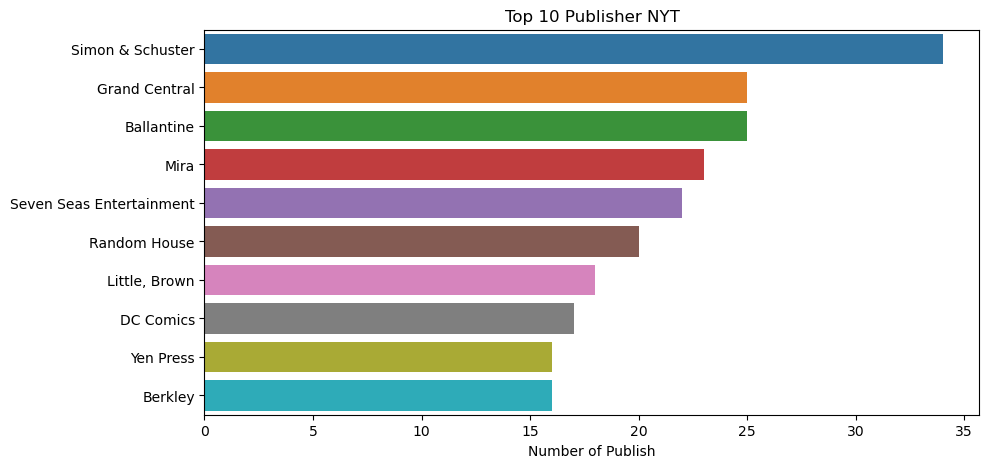

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_publisher.Title,y=top_publisher.Title.index)

plt.ylabel(None);
plt.xlabel('Number of Publish')
plt.title('Top 10 Publisher NYT');

In [24]:
df.groupby(clean_data['Week_On_List']).count

<bound method GroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001A15ECC5C70>>

In [25]:
a

NameError: name 'a' is not defined

In [ ]:
clean

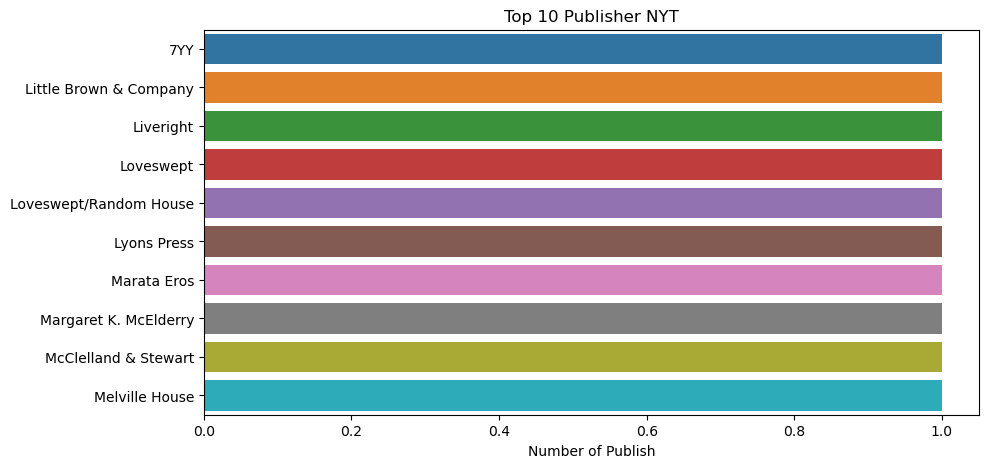

In [447]:
plt.figure(figsize=(10,5))
sns.barplot(x=tail_publisher.Title,y=tail_publisher.Title.index)

plt.ylabel(None);
plt.xlabel('Number of Publish')
plt.title('Top 10 Publisher NYT');

In [2]:
clean_data.Ranks_history[0]

NameError: name 'clean_data' is not defined